In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import json

# Read JSON string from file
with open('./data/total_Potsdam_with_energies.json', 'r') as file:
    json_string = file.read()

# Convert JSON string to a Python dictionary
data = json.loads(json_string)
highways = data['highways']
areas = data['areas']
buildings = data['buildings']

In [4]:
# Display the dictionary
df_highways = pd.DataFrame(highways).T
df_highways.head()

,id,type,geometry,open
c32643a7-c3ee-4461-bff7-b867769d2792,c32643a7-c3ee-4461-bff7-b867769d2792,road,"[{'lat': 52.413459, 'lon': 13.0913285}, {'lat'...",True
ec6d57d0-4419-4a19-a5f8-1f671167d621,ec6d57d0-4419-4a19-a5f8-1f671167d621,road,"[{'lat': 52.4739074, 'lon': 12.9527293}, {'lat...",True
1a215b06-3d58-4999-8484-8bd44a2da392,1a215b06-3d58-4999-8484-8bd44a2da392,road,"[{'lat': 52.4552465, 'lon': 12.93694}, {'lat':...",True
c4137296-0f5a-4060-a948-485276f8531d,c4137296-0f5a-4060-a948-485276f8531d,road,"[{'lat': 52.4417121, 'lon': 13.048136}, {'lat'...",True
fcd65a8b-fde9-47f7-968f-5a91f0169843,fcd65a8b-fde9-47f7-968f-5a91f0169843,road,"[{'lat': 52.4708827, 'lon': 13.1018333}, {'lat...",True


In [5]:
df_highways['open'].value_counts()

open
True    10706
Name: count, dtype: int64

In [6]:
df_highways['type'].value_counts()

type
road    10706
Name: count, dtype: int64

<Axes: >

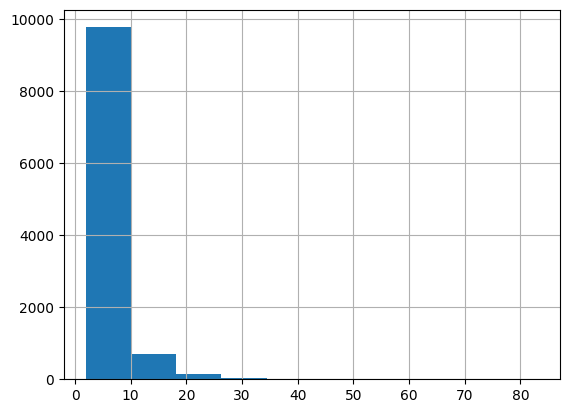

In [7]:
df_highways['geometry_len'] = df_highways['geometry'].apply(lambda x: len(x))
df_highways['geometry_len'].hist()

In [8]:
df_highways['geometry_len'].describe()

count    10706.000000
mean         4.865029
std          4.636612
min          2.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         83.000000
Name: geometry_len, dtype: float64

In [9]:
df_highways['geometry_average_lat'] = df_highways['geometry'].apply(lambda x: np.mean([y['lat'] for y in x]))
df_highways['geometry_average_lon'] = df_highways['geometry'].apply(lambda x: np.mean([y['lon'] for y in x]))

In [10]:
df_highways[df_highways['geometry_average_lon'] < 0]

,id,type,geometry,open,geometry_len,geometry_average_lat,geometry_average_lon
cf123a09-59f3-4d55-93c9-95500c59d868,cf123a09-59f3-4d55-93c9-95500c59d868,road,"[{'lat': 39.9643827, 'lon': -84.4167462}, {'la...",True,2,39.964379,-84.417045
56b131f9-7d70-435f-9a39-c01785bcf0a7,56b131f9-7d70-435f-9a39-c01785bcf0a7,road,"[{'lat': 39.9645868, 'lon': -84.4145291}, {'la...",True,12,39.965149,-84.414824
47f10e47-78ba-4248-a0c4-5369777b6c82,47f10e47-78ba-4248-a0c4-5369777b6c82,road,"[{'lat': 39.9640213, 'lon': -84.4167474}, {'la...",True,2,39.964022,-84.417038
ff745611-ee9a-4a95-b4f8-3ab78582a3f5,ff745611-ee9a-4a95-b4f8-3ab78582a3f5,road,"[{'lat': 39.9668622, 'lon': -84.417431}, {'lat...",True,4,39.966807,-84.418190
7eb2808a-60e0-46d4-a982-d6a4625a51e6,7eb2808a-60e0-46d4-a982-d6a4625a51e6,road,"[{'lat': 39.9677423, 'lon': -84.4174426}, {'la...",True,7,39.967552,-84.413771
a8414103-0978-435f-8035-b5601fe1895d,a8414103-0978-435f-8035-b5601fe1895d,road,"[{'lat': 39.9634629, 'lon': -84.4150114}, {'la...",True,2,39.964018,-84.415004
b3ba868c-0377-49cc-97ff-39017a273dff,b3ba868c-0377-49cc-97ff-39017a273dff,road,"[{'lat': 39.9630293, 'lon': -84.4173292}, {'la...",True,6,39.963116,-84.419854
9fde5fa9-2851-4912-8b0d-b2ac6b45a1dd,9fde5fa9-2851-4912-8b0d-b2ac6b45a1dd,road,"[{'lat': 39.9648219, 'lon': -84.4173594}, {'la...",True,2,39.964824,-84.418032
c79d46f4-2130-44b7-8ae0-ec5fe7fd26f3,c79d46f4-2130-44b7-8ae0-ec5fe7fd26f3,road,"[{'lat': 39.96338, 'lon': -84.427184}, {'lat':...",True,26,39.963442,-84.414691
2f391caa-2748-4660-8e51-e766add9e00f,2f391caa-2748-4660-8e51-e766add9e00f,road,"[{'lat': 39.9634577, 'lon': -84.4173252}, {'la...",True,8,39.961189,-84.417314


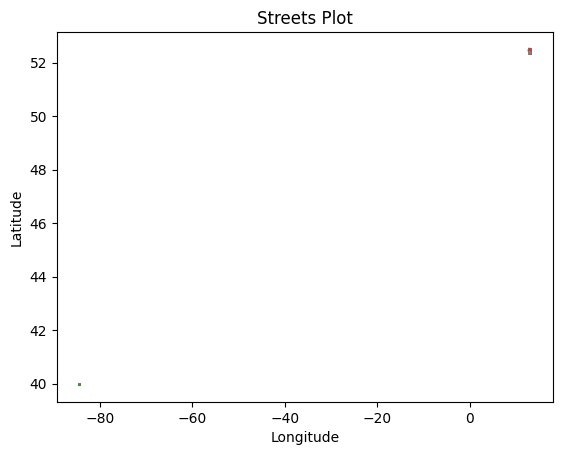

In [11]:
import matplotlib.pyplot as plt


streets = df_highways['geometry']

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Plot each street
for street in streets:
    lats = [point['lat'] for point in street]
    lons = [point['lon'] for point in street]
    ax.plot(lons, lats)  # Plots the street

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Streets Plot')

# Show the plot
plt.show()

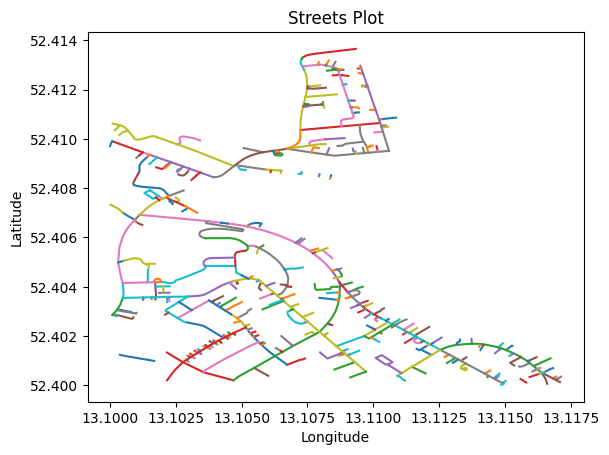

In [12]:
import matplotlib.pyplot as plt


# shuffle df_highways
df_highways2 = df_highways.sample(frac=1)

# Example list of streets
streets = df_highways2['geometry']


# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Plot each street
for street in streets:
    lats = [point['lat'] for point in street if point['lat'] > 52.40 and point['lat'] < 52.43 and point['lon'] > 13.10 and point['lon'] < 13.13]
    lons = [point['lon'] for point in street if point['lat'] > 52.40 and point['lat'] < 52.43 and point['lon'] > 13.10 and point['lon'] < 13.13]
    ax.plot(lons, lats)  # Plots the street

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Streets Plot')

# Show the plot
plt.show()

In [13]:
df_areas = pd.DataFrame(areas).T
df_areas.head()

,id,type,geometry,open,base_area
bace10d3-92eb-4810-8200-a5eae70a1767,bace10d3-92eb-4810-8200-a5eae70a1767,useable_field,"[{'lat': 52.4182188, 'lon': 12.9859048}, {'lat...",False,45464.893017
43f39c87-3f9a-4f2a-8788-c5d44cf73d56,43f39c87-3f9a-4f2a-8788-c5d44cf73d56,useable_field,"[{'lat': 52.4137953, 'lon': 12.9895919}, {'lat...",False,101221.584338
20d9c1ba-57e2-411a-830f-7ea7606531b9,20d9c1ba-57e2-411a-830f-7ea7606531b9,useable_field,"[{'lat': 52.4378209, 'lon': 12.9899749}, {'lat...",False,20111.451929
073a1b88-8343-43bc-ad3b-663dd756d813,073a1b88-8343-43bc-ad3b-663dd756d813,useable_field,"[{'lat': 52.4395878, 'lon': 12.9967481}, {'lat...",False,16627.553116
3fd3aee6-9c11-4e6d-bb93-d54a032c586b,3fd3aee6-9c11-4e6d-bb93-d54a032c586b,useable_field,"[{'lat': 52.4424038, 'lon': 12.9959935}, {'lat...",False,59974.423091


In [14]:
df_areas['open'].value_counts()

open
False    2928
Name: count, dtype: int64

In [15]:
df_areas['type'].value_counts()

type
useable_field    2928
Name: count, dtype: int64

In [16]:
df_areas['geometry_average_lat'] = df_areas['geometry'].apply(lambda x: np.mean([y['lat'] for y in x]))
df_areas['geometry_average_lon'] = df_areas['geometry'].apply(lambda x: np.mean([y['lon'] for y in x]))

In [17]:
df_areas['geometry_average_lat'].describe()

count    2928.000000
mean       52.408097
std         0.029486
min        52.330372
25%        52.393169
50%        52.402470
75%        52.413826
max        52.513051
Name: geometry_average_lat, dtype: float64

In [18]:
df_areas['geometry_average_lon'].describe()

count    2928.000000
mean       13.044553
std         0.053387
min        12.886275
25%        13.004836
50%        13.050725
75%        13.088482
max        13.164931
Name: geometry_average_lon, dtype: float64

In [19]:
df_buildings = pd.DataFrame(buildings).T
df_buildings.head()

,id,type,geometry,open,base_area,levels,area,winter,summer
4d95005f-be67-429d-99e0-d66be46b37ec,4d95005f-be67-429d-99e0-d66be46b37ec,commercial,"[{'lat': 52.3923934, 'lon': 13.0637637}, {'lat...",False,26875.736643,5.0,134378.683214,"{'Electro': [1080.7609950468132, 1184.52723691...","{'Electro': [1566.232373089273, 1782.250403138..."
18b63edd-9f2a-433d-ad57-b9c2a19a5f7b,18b63edd-9f2a-433d-ad57-b9c2a19a5f7b,residential,"[{'lat': 52.4035918, 'lon': 13.0348541}, {'lat...",False,1911.883325,1.0,1911.883325,"{'Electro': [1.4447392830687957, 1.49226310559...","{'Electro': [1.6564333740833095, 1.66241100619..."
92c4f906-b3fd-4300-8b36-2e72b4fa72a2,92c4f906-b3fd-4300-8b36-2e72b4fa72a2,commercial,"[{'lat': 52.3898626, 'lon': 13.0662383}, {'lat...",False,281.950951,3.0,845.852852,"{'Electro': [9.109565432037884, 6.790031544459...","{'Electro': [16.117182158484848, 9.76328371763..."
bb371c1f-be6a-4d71-97d2-f1ba7b59e465,bb371c1f-be6a-4d71-97d2-f1ba7b59e465,high_density_residential,"[{'lat': 52.3902832, 'lon': 13.0653137}, {'lat...",False,295.526487,3.0,886.579461,"{'Electro': [1.9660825924560321, 1.25564951400...","{'Electro': [1.6252953077772767, 0.72191541822..."
721508cb-4133-4b18-8623-6886a98f8133,721508cb-4133-4b18-8623-6886a98f8133,high_density_residential,"[{'lat': 52.3903082, 'lon': 13.0657574}, {'lat...",False,225.468818,3.0,676.406455,"{'Electro': [0.8910132172884115, 0.80465529441...","{'Electro': [0.507145144446488, 0.486923286194..."


In [20]:
df_buildings['open'].value_counts()

open
False    34923
Name: count, dtype: int64

In [21]:
len(df_buildings), df_buildings['geometry'].apply(lambda x: len(x)).sum()

(34923, 243105)

<Axes: ylabel='count'>

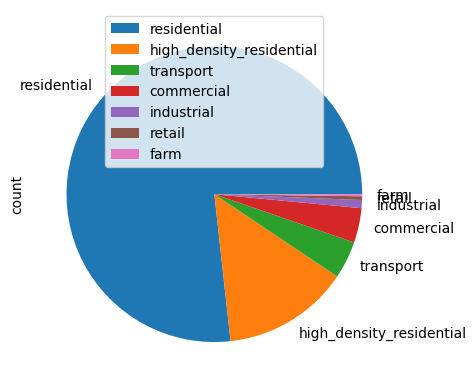

In [22]:
# plot type in a pie chart
df_buildings['type'].value_counts().plot.pie(legend=True)

In [23]:
# histogram of the base area
df_buildings['base_area'].astype(float).describe()

count    34923.000000
mean       199.791696
std        581.936633
min          0.363159
25%         61.932940
50%        109.173021
75%        182.575314
max      57057.160143
Name: base_area, dtype: float64

<Axes: >

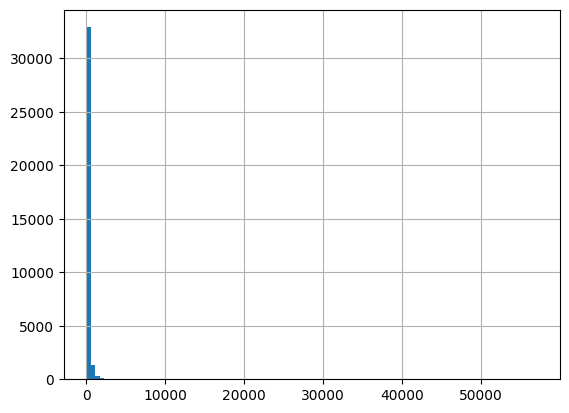

In [24]:
df_buildings['base_area'].hist(bins=100)

In [25]:
max_building = df_buildings[df_buildings['id'] == df_buildings['area'].idxmax()].iloc[0]

In [26]:
max_building

id                        d6651651-6876-4a8d-820b-98cdc6aa3a5a
type                                                    retail
geometry     [{'lat': 52.3710165, 'lon': 13.1316316}, {'lat...
open                                                     False
base_area                                         57057.160143
levels                                                     3.0
area                                             171171.480428
winter       {'Electro': [931.3850935871856, 932.7959522053...
summer       {'Electro': [718.5614624989812, 721.8198148066...
Name: d6651651-6876-4a8d-820b-98cdc6aa3a5a, dtype: object

In [27]:
len(max_building['geometry'])

79

In [28]:
df_highways['geometry_len'].sum()

52085

In [29]:
# well oops, no levels means no consumption
df_buildings[df_buildings['levels'] == 0]

,id,type,geometry,open,base_area,levels,area,winter,summer
89a09fe6-c6cd-40b0-989d-6cbecf39f825,89a09fe6-c6cd-40b0-989d-6cbecf39f825,industrial,"[{'lat': 52.4046131, 'lon': 13.0072932}, {'lat...",False,15.906934,0.0,0.0,"{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
72f502ea-601e-43bd-992e-e0ce429a9769,72f502ea-601e-43bd-992e-e0ce429a9769,industrial,"[{'lat': 52.3834022, 'lon': 13.0911847}, {'lat...",False,29.477778,0.0,0.0,"{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
5387d14f-6575-4f35-95ab-edbedf55c654,5387d14f-6575-4f35-95ab-edbedf55c654,transport,"[{'lat': 52.3685155, 'lon': 13.088217}, {'lat'...",False,237.360099,0.0,0.0,"{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
699cb3ba-4ab4-4686-a066-ccfa8fc67bb1,699cb3ba-4ab4-4686-a066-ccfa8fc67bb1,transport,"[{'lat': 52.3688478, 'lon': 13.0881314}, {'lat...",False,251.340879,0.0,0.0,"{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'Electro': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [30]:
df_buildings['geometry_average_lat'] = df_buildings['geometry'].apply(lambda x: np.mean([y['lat'] for y in x]))
df_buildings['geometry_average_lon'] = df_buildings['geometry'].apply(lambda x: np.mean([y['lon'] for y in x]))

In [31]:
df_buildings['geometry_average_lat'].describe()

count    34923.000000
mean        52.407978
std          0.462567
min        -33.833679
25%         52.388554
50%         52.403344
75%         52.424208
max         52.505021
Name: geometry_average_lat, dtype: float64

In [32]:
df_buildings['geometry_average_lon'].describe()

count    34923.000000
mean        13.059333
std          0.058201
min         12.892568
25%         13.022654
50%         13.058160
75%         13.102264
max         18.526023
Name: geometry_average_lon, dtype: float64

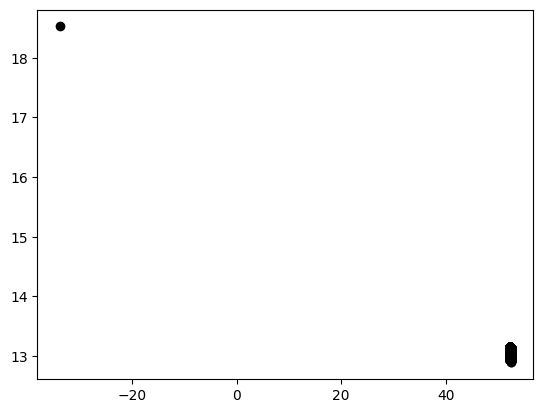

In [33]:
plt.plot(df_buildings['geometry_average_lat'], df_buildings['geometry_average_lon'], 'o', color='black')

In [34]:
df_buildings['base_area'].sum()

6977325.382188104

In [35]:
df_buildings['winter_electro'] = df_buildings.apply(lambda x: np.array(x['winter']['Electro']), axis=1)

In [36]:
df_buildings['summer_electro'] = df_buildings.apply(lambda x: np.array(x['summer']['Electro']), axis=1)

In [37]:
df_buildings['winter_heating'] = df_buildings.apply(lambda x: (np.array(x['winter']['Heating'])) if 'Heating' in x['winter'] else np.array([0 for _ in range(len(x['winter']['Electro']))]), axis=1)
df_buildings['summer_heating'] = df_buildings.apply(lambda x: (np.array(x['summer']['Heating'])) if 'Heating' in x['summer'] else np.array([0 for _ in range(len(x['summer']['Electro']))]), axis=1)

In [38]:
df_buildings['winter_heating']

4d95005f-be67-429d-99e0-d66be46b37ec    [1411.3295895154215, 1584.871729458175, 1563.6...
18b63edd-9f2a-433d-ad57-b9c2a19a5f7b    [63.23167486992814, 67.09388210665323, 69.5536...
92c4f906-b3fd-4300-8b36-2e72b4fa72a2    [9.976048580543003, 9.842686181837191, 13.3969...
bb371c1f-be6a-4d71-97d2-f1ba7b59e465    [12.663193822220272, 13.773087193976162, 15.51...
721508cb-4133-4b18-8623-6886a98f8133    [9.420790525798289, 9.661250247970509, 10.5080...
                                                              ...                        
742eb172-d15a-4a83-964f-ca4a7b17a0a9    [3.774148269310008, 3.749932626294156, 3.97897...
881d87b2-2a33-4ecf-9666-cf644d0da1a0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
ec891d2d-482d-4c39-97d5-db013e6f08b6    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4f13a7e8-b09f-407e-b6b5-337bc5b71131    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
fa56fde0-4911-44ef-9b90-fed7b77b9497    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: wint

In [39]:
df_buildings_by_type = df_buildings.groupby('type').apply(lambda x: x.iloc[0])

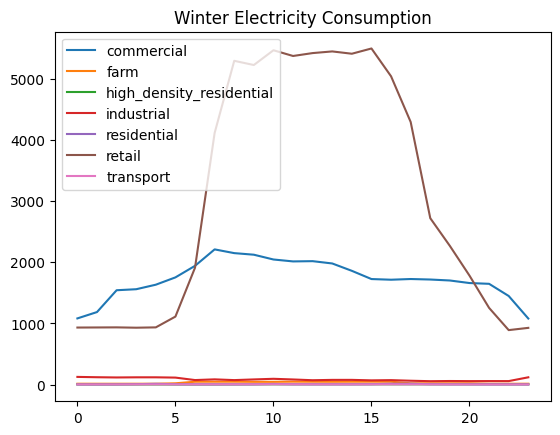

In [40]:
for i, row in df_buildings_by_type.iterrows():
    pd.Series(row['winter_electro']).plot(label=row['type'])
plt.legend()
plt.title('Winter Electricity Consumption')
plt.show()

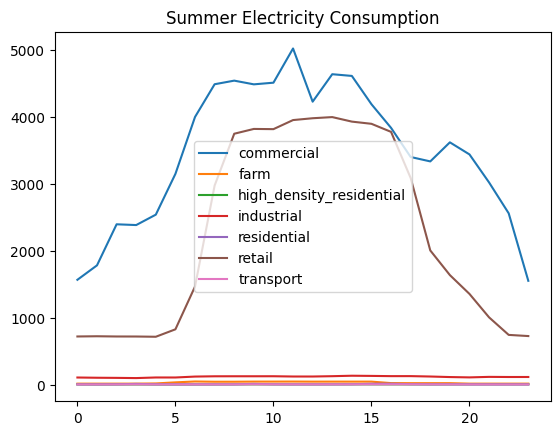

In [41]:
for i, row in df_buildings_by_type.iterrows():
    pd.Series(row['summer_electro']).plot(label=row['type'])
plt.legend()
plt.title('Summer Electricity Consumption')
plt.show()

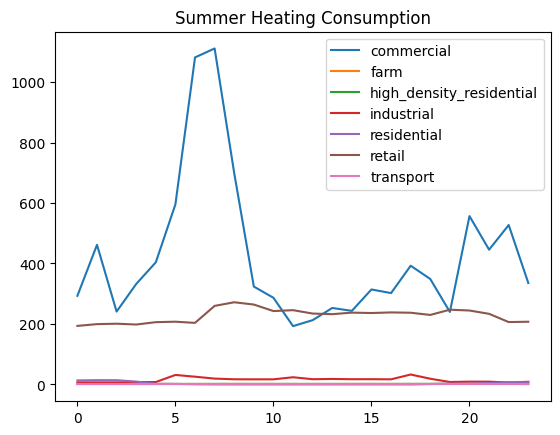

In [42]:
for i, row in df_buildings_by_type.iterrows():
    pd.Series(row['summer_heating']).plot(label=row['type'])
plt.legend()
plt.title('Summer Heating Consumption')
plt.show()

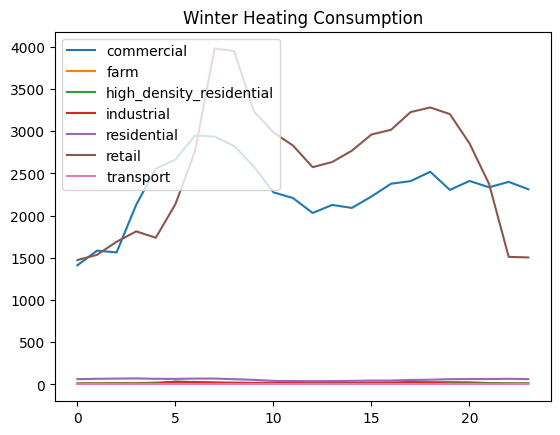

In [43]:
for i, row in df_buildings_by_type.iterrows():
    pd.Series(row['winter_heating']).plot(label=row['type'])
plt.legend()
plt.title('Winter Heating Consumption')
plt.show()

<Axes: >

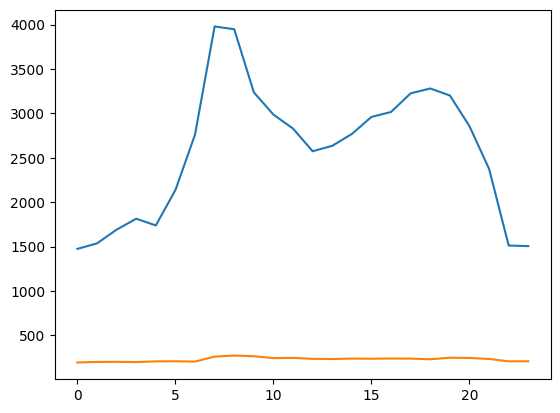

In [44]:
winter = max_building['winter']['Heating']
summer = max_building['summer']['Heating']
pd.Series(winter).plot()
pd.Series(summer).plot()

# Total Areas

In [45]:
total_electro_summer = 0
total_electro_winter = 0
total_heating_summer = 0
total_heating_winter = 0
df_residential = df_buildings[(df_buildings['type'] == 'residential') | (df_buildings['type'] == 'high_density_residential')]
for i, row in df_residential.iterrows():
    total_electro_summer += np.sum(row['summer']['Electro'])
    total_electro_winter += np.sum(row['winter']['Electro'])
    if 'Heating' in row['summer']:
        total_heating_summer += np.sum(row['summer']['Heating'])
    if 'Heating' in row['winter']:
        total_heating_winter += np.sum(row['winter']['Heating'])
total_electro = total_electro_summer + total_electro_winter
total_heating = total_heating_summer + total_heating_winter

In [46]:
total_electro / len(df_residential), total_heating / len(df_residential)

(60.955891745889325, 383.4817446758092)

In [47]:
total_electro_summer = 0
total_electro_winter = 0
total_heating_summer = 0
total_heating_winter = 0
for i, row in df_buildings.iterrows():
    total_electro_summer += np.sum(row['summer']['Electro'])
    total_electro_winter += np.sum(row['winter']['Electro'])
    if 'Heating' in row['summer']:
        total_heating_summer += np.sum(row['summer']['Heating'])
    if 'Heating' in row['winter']:
        total_heating_winter += np.sum(row['winter']['Heating'])
total_electro = total_electro_summer + total_electro_winter
total_heating = total_heating_summer + total_heating_winter
total_electro, total_heating

(7759088.315197891, 14434596.974458532)